## Face Detection Model

There are four different ways to detect faces in an image, as described by Yan, Kriegman, and Ahuja. They are:

1) Knowledge Based - This method is based on a set of rules and human knowledge.

2) Feature Based - This method locate faces by extracting structural features from a face.

3) Template Matching Based - This method uses pre-defined or parameterised face templates to locate or detect the faces by the correlation between the templates and input images.

4) Appearance Based - It depend on set of training face images to detect face. It is mainly used for face recognition.

In [1]:
import os
import io
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import glob
import sys
import csv
import random
import math
import argparse
from keras import layers,models,regularizers,optimizers,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from imutils import face_utils 
import argparse 
import imutils 
import dlib 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import pandas as pd
import json
from tensorflow.keras.applications import VGG16
from mtcnn.mtcnn import MTCNN

## Haar Cascade Classifier

Developed by Paul Viola and Michael Jones, this classifier is based on haar features. Haar-like features are the features that considers adjacent rectangular regions at a specific location in a detection window, sums up the pixel intensities in each region and calculates the difference between these sums. This difference is then used to categorize subsections of an image.

In the Viola-Jones method, a window of the target size is moved over the input image, and for each subsection of the image the Haar-like feature is calculated. This difference is then compared to a learned threshold that separates non-objects from objects. 

But haar like feature is only a weak learner, therefore several haar like features are cascaded to form a strong learner. Cascading features implies that the output of one classifier is fed into the input of another classifier.

Viola-Jones have used three features,i.e., Edge features, line features and four-rectangle feature.

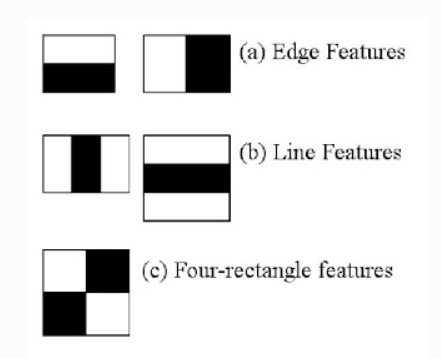

In [2]:
frame = cv2.imread('C:/Users/swati/Desktop/IP Project/download.jpg')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

detections = face_cascade.detectMultiScale(frame)  #This will give all regions where it thinks there is a face
ROI_number = 0
for i in range(len(detections)):
  (x,y,w,h) = detections[i]
  #frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  roi = frame[y:y+h, x:x+w]
  cv2.imwrite('C:/Users/swati/Desktop/IP Project/ROI_{}.jpg'.format(ROI_number), roi)
  ROI_number += 1

cv2.imshow('Original Image',frame)
cv2.waitKey(0)
for i in range(ROI_number):
  img1 = cv2.imread('C:/Users/swati/Desktop/IP Project/ROI_{}.jpg'.format(i))
  cv2.imshow('Face number:{}'.format(i),img1)
  cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()

# dlib library Face Detection using SVM and HoG features

The model is built out of 5 HOG filters – front looking, left looking, right looking, front looking but rotated left, and a front looking but rotated right. These filters are applied on the image and then supplied to the linear classifier.

In the HOG (Histogram of Gradients) feature descriptor, the distribution ( histograms ) of directions of gradients ( oriented gradients ) are used as features. Gradients ( x and y derivatives ) of an image are useful because the magnitude of gradients is large around edges and corners ( regions of abrupt intensity changes ) and we know that edges and corners pack in a lot more information about object shape than flat regions.

For finding the gradient, SOBEL or the below filter is applied.
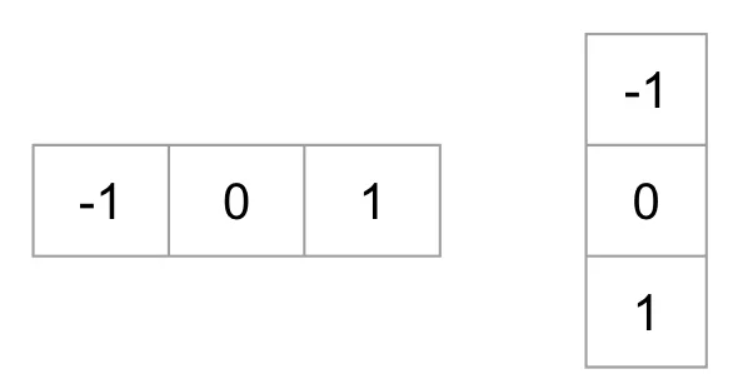

On applying these filters, we can get the horizontal and vertical gradient values of an image. Magnitude and direction of this is calculated for each pixel using the formula:
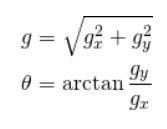
This is used for creating the histogram where direction determines the number of bins and magnitude is treated as intensity.

After finding the HoG of each image in the dataset, SVM classifier is used 

In [3]:
image = cv2.imread('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss4.png')
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("C:/Users/swati/IP Project/shape_predictor_68_face_landmarks.dat")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)
print(rects)
ROI_number=0
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    print(shape[32])
    #print(shape)
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    """
    roi = image[y:y+h, x:x+w]
    cv2.imwrite('C:/Users/swati/Desktop/Image Processing/ROI_{}.jpg'.format(ROI_number), roi)
    ROI_number += 1

cv2.imshow('Original Image',image)
cv2.waitKey(0)
for i in range(ROI_number):
  img1 = cv2.imread('C:/Users/swati/Desktop/Image Processing/ROI_{}.jpg'.format(i))
for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
  cv2.imshow('Face number:{}'.format(i),img1)
  cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()
"""
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

rectangles[]


# dlib Library Face Detection using CNN

This method uses a Maximum-Margin Object Detector ( MMOD ) with CNN based features.

Generally, after finding all the possible boxes which might contain a face, the overlapping sub-windows are removed and the best is chosen from them using non-maximum suppression method. Sub-sampling need to be done for this, while in MMOD, sub-sampling is not required and the operation is done on all the sub-windows.

It uses CNN instead of HoG, thus it is a fully-automatic system.

In [4]:
image1 = cv2.imread('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss0.png')
cnn_face_detector = dlib.cnn_face_detection_model_v1('C:/Users/swati/IP Project/mmod_human_face_detector.dat')
faces_cnn1 = cnn_face_detector(image1, 1)
for face in faces_cnn1:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

     # draw box over face
    cv2.rectangle(image1, (x,y), (x+w,y+h), (0,0,255), 2)
cv2.imshow("Unmasked Image", image1)
cv2.waitKey(0)

image2 = cv2.imread('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss4.png')
faces_cnn2 = cnn_face_detector(image2, 1)
for face in faces_cnn2:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

     # draw box over face
    cv2.rectangle(image2, (x,y), (x+w,y+h), (0,0,255), 2)
cv2.imshow("Masked Image", image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# MTCNN Face Detection

This method uses a cascade of three neural networks. This implies that the input of one network is given to the next network.

In the initial step, image pyramid is made for each of the input image, i.e, different sized image of the same image is made in order to detect very small faces also.

1) P-Net
Then a 12x12 kernel is applied on each of the copies of image. Output after applying the kernel on each stride is fed into the P-Net neural network which gives the coordinates of bounding box. The bounding box with less confidence is removed before applying it to the next neural network.

2) R-Net
The pixels falling in the bounding box is stored in an array and pixel values are normalized. Thus the resulting vector is given as input to the R-Net. The output obtained from R-Net is similar to the output of P-Net and same measures are used for eliminating unnecessary and wrong bounding boxes.

3) O-Net
Output from R-Net is given to O-Net. The output of O-Net also include coordinates of facial landmarks and confidence value along with bounding box coordinates.

https://towardsdatascience.com/face-detection-neural-network-structure-257b8f6f85d1

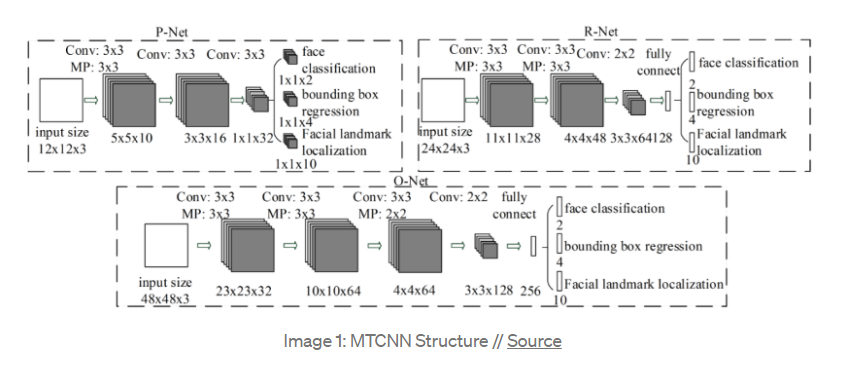

In [5]:
detector = MTCNN()
image = cv2.imread('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss211.png')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(image)
ROI_number=0
for face in faces:
    x,y,w,h = face['box']
    roi = rgb[y:y+h,x:x+w]
    print("For face "+str(ROI_number)+":")
    print(face['keypoints']['nose'])
    print(face['keypoints']['mouth_right'])
    print(face['keypoints']['mouth_left'])
    print(face['confidence'])
    #cv2.imwrite('C:/Users/swati/Desktop/Image Processing/ROI_MTCNN_{}.jpg'.format(ROI_number), roi)
    ROI_number += 1
#cv2.imshow('Original Image',image)
#cv2.waitKey(0)
'''
for i in range(ROI_number):
  img1 = cv2.imread('C:/Users/swati/Desktop/Image Processing/ROI_MTCNN_{}.jpg'.format(i))
  cv2.imshow('Face number:{}'.format(i),img1)
  cv2.waitKey(0)
#cap.release()
cv2.destroyAllWindows()'''

For face 0:
(210, 158)
(240, 178)
(186, 178)
0.9975833892822266


"\nfor i in range(ROI_number):\n  img1 = cv2.imread('C:/Users/swati/Desktop/Image Processing/ROI_MTCNN_{}.jpg'.format(i))\n  cv2.imshow('Face number:{}'.format(i),img1)\n  cv2.waitKey(0)\n#cap.release()\ncv2.destroyAllWindows()"

# HoG Feature Extraction From an Image

(1201, 1200, 3)
(128, 64, 3)
(3780,)


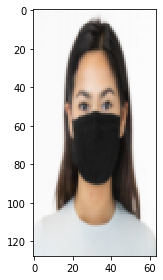

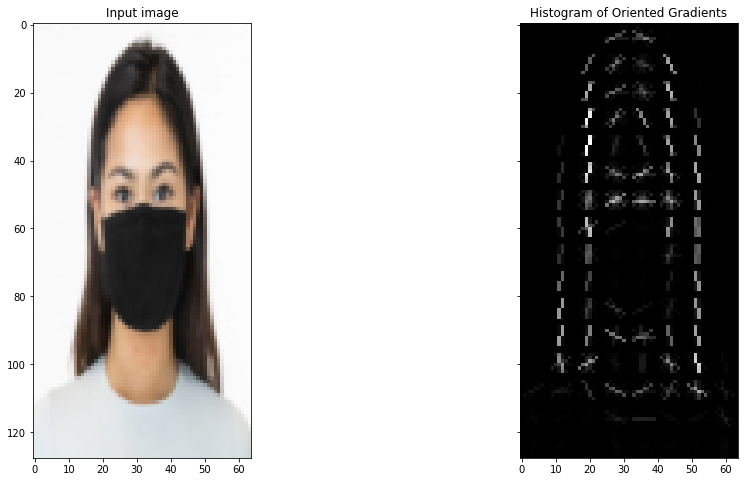

In [6]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('C:/Users/swati/Desktop/IP Project/5.jpg')
imshow(img)
print(img.shape)
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
print(fd.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [7]:
print(fd)

[3.05531931e-01 2.61256990e-15 1.70860629e-01 ... 1.19789761e-02
 1.42466837e-01 2.73184229e-01]


## CNN For Face Classification

As the result of haar cascade classifier suggests, it is not very effective in detecting faces with masks on them. So I tried to find a different way to detect faces effectively. For that, I used a convolutional neural network based deep learning model.

In [8]:
Base_dir = os.getcwd()
image_dir = os.path.join(Base_dir,'dataset','images')
annot_dir = os.path.join(Base_dir,'dataset','annotations')

# Data Preprocessing

The dataset is picked from a face mask detection kaggle competition. It initially had two folders, one containing all the images and the other with annotations in .xml format for each image. The annotation file contained image name, rectangle coordinates of each face in the image and labels of masked or not masked or improperly masked.

I created two separate folder for storing the training and testing dataset. Each image is taken from the image folder and their corresponding annotation file is taken to get coordinates of each face. The ROI of face is taken from the image and added to the pos folder in train folder and a random ROI is picked from the same image to put in the neg folder.

This way equal proportion of positive and negative images is fed into the network.

In [9]:
datas=[]
for root,dirs,files in os.walk(annot_dir):
    for file in files:
        tree=ET.parse(os.path.join(root,file))
        data={'path':None,'objects':[]}
        data['path']=os.path.join(image_dir,tree.find('filename').text)
        for obj in tree.findall('object'):
            xmin = int(obj.find('bndbox/xmin').text)
            ymin=int(obj.find('bndbox/ymin').text)
            xmax=int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)
            data['objects'].append([xmin,ymin,xmax,ymax])
        datas.append(data)
print(len(datas))
#print(datas)
print(len(datas[1]['objects']))

853
9


In [10]:
print(datas[0]['path'])
print(datas[0]['objects'])
index=datas[0]['path'].rfind('\\')
print(datas[0]['path'][index+1:])
print(datas[0]['path'][:index])

C:\Users\swati\Desktop\IP Project\dataset\images\maksssksksss0.png
[[79, 105, 109, 142], [185, 100, 226, 144], [325, 90, 360, 141]]
maksssksksss0.png
C:\Users\swati\Desktop\IP Project\dataset\images


In [11]:
save_dir  = '.\dataset\cache'
#os.mkdir(save_dir)
save_folder_train = os.path.join(save_dir,'train')
#os.mkdir(save_folder_train)

save_folder_test = os.path.join(save_dir,'test')
#os.mkdir(save_folder_test)

positive_train = os.path.join(save_folder_train,'pos')
#os.mkdir(positive_train)

negative_train = os.path.join(save_folder_train,'neg')
#os.mkdir(negative_train)

positive_test = os.path.join(save_folder_test,'pos')
#os.mkdir(positive_test)

negative_test = os.path.join(save_folder_test,'neg')
#os.mkdir(negative_test)

In [12]:
print(len(datas[0]['objects']))
print(random.randint(0,len(datas[0]['objects'])))

3
3


In [13]:
patch_Size = 60
train_size = 600
test_size = len(datas) - train_size

for i in range(0,train_size):
    per_data = datas[i]
    full_name = per_data['path']
    index = full_name.rfind('\\')
    img_name = full_name[index+1:]
    folder_name = full_name[:index]
    len_ob=len(per_data['objects'])
    img = cv2.imread(folder_name+'\\'+img_name)
    #num=random.randint(0,len_ob)
    #l=per_data['objects'][num-1]
    for j in range(len_ob):
        l=per_data['objects'][j]
        X=int(float(l[0]))
        Y=int(float(l[1]))
        W=int(float(l[2]))
        H=int(float(l[3]))

    #folder_path = os.path.join(image_dir,folder_name)
    #for filename in os.listdir(folder_name):
        cv2.rectangle(img,(X,Y),(X+W,Y+H),(255,255,255))
            
        cropped_image_pos = img[Y:Y+H,X:X+W]
        cropped_image_neg = img[0:(j+1)*patch_Size,0:(j+1)*patch_Size]
        
        a=img_name.rfind('.')
        img_n=img_name[:a]
        img_n=img_n+str(j)
        img_name=img_n+img_name[a:]
        
        resized_pos = cv2.resize(cropped_image_pos,(patch_Size,patch_Size))
        cv2.imwrite(positive_train+'\\'+img_name,resized_pos)
            
        resized_neg = cv2.resize(cropped_image_neg,(patch_Size,patch_Size))
        cv2.imwrite(negative_train+'\\'+img_name,resized_neg)

for i in range(train_size,train_size+test_size):
    per_data = datas[i]
    full_name = per_data['path']
    index = full_name.rfind('\\')
    img_name = full_name[index+1:]
    folder_name = full_name[:index]
    len_ob=len(per_data['objects'])
    img = cv2.imread(folder_name+'\\'+img_name)
    #num=random.randint(0,len_ob)
    for j in range(len_ob):
        l=per_data['objects'][j]
        X=int(float(l[0]))
        Y=int(float(l[1]))
        W=int(float(l[2]))
        H=int(float(l[3]))
        
        #folder_path = os.path.join(image_dir,folder_name)
        cv2.rectangle(img,(X,Y),(X+W,Y+H),(255,255,255))
            
        cropped_image_pos = img[Y:Y+H,X:X+W]
        cropped_image_neg = img[0:(j+1)*patch_Size,0:(j+1)*patch_Size]
        
        a=img_name.rfind('.')
        img_n=img_name[:a]
        img_n=img_n+str(j)
        img_name=img_n+img_name[a:]
        
        resized_pos = cv2.resize(cropped_image_pos,(patch_Size,patch_Size))
        cv2.imwrite(positive_test+'\\'+img_name,resized_pos)
            
        resized_neg = cv2.resize(cropped_image_neg,(patch_Size,patch_Size))
        cv2.imwrite(negative_test+'\\'+img_name,resized_neg)

In [14]:
train_dir = save_folder_train
test_dir = save_folder_test

reg_val =[]
lr_val=[]
test_loss=[]
test_acc=[]

for epoch in range(25):
    print("Epoch number: \n"+str(epoch+1))
    reg = 10**(np.random.uniform(-4,0))
    lr = 10**(np.random.uniform(-3,-4))
    
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(reg)))
    
    model.summary()
    
    model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=lr),metrics=['acc'])
    
    train_data=ImageDataGenerator(rescale=1./255)
    test_data=ImageDataGenerator(rescale=1./255)
    
    train_generator=train_data.flow_from_directory(train_dir,target_size=(60,60),batch_size=50,class_mode='binary')
    
    test_generator=test_data.flow_from_directory(test_dir,target_size=(60,60),batch_size=50,class_mode='binary')
    
    history=model.fit_generator(train_generator,epochs=5,validation_data=test_generator)
    
    reg_val.append(reg)
    lr_val.append(lr)
    test_loss.append(history.history['val_loss'])
    test_acc.append(history.history['val_acc'])

Epoch number: 
1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 

Found 6938 images belonging to 2 classes.
Found 2732 images belonging to 2 classes.
Epoch 1/5
139/139 [==============================] - 30s 217ms/step - loss: 0.6624 - acc: 0.7390 - val_loss: 0.3889 - val_acc: 0.9026
Epoch 2/5
139/139 [==============================] - 30s 216ms/step - loss: 0.3416 - acc: 0.9020 - val_loss: 0.2563 - val_acc: 0.9308
Epoch 3/5
139/139 [==============================] - 31s 224ms/step - loss: 0.2597 - acc: 0.9259 - val_loss: 0.2120 - val_acc: 0.9510
Epoch 4/5
139/139 [==============================] - 30s 219ms/step - loss: 0.2068 - acc: 0.9451 - val_loss: 0.2281 - val_acc: 0.9359
Epoch 5/5
139/139 [==============================] - 32s 229ms/step - loss: 0.1704 - acc: 0.9562 - val_loss: 0.1559 - val_acc: 0.9616
Epoch number: 
5
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 58, 58, 32)        896       
_________

Epoch 4/5
139/139 [==============================] - 37s 265ms/step - loss: 0.2907 - acc: 0.9109 - val_loss: 0.2406 - val_acc: 0.9363
Epoch 5/5
139/139 [==============================] - 41s 292ms/step - loss: 0.2562 - acc: 0.9212 - val_loss: 0.2980 - val_acc: 0.9074
Epoch number: 
8
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (Non

Found 6938 images belonging to 2 classes.
Found 2732 images belonging to 2 classes.
Epoch 1/5
139/139 [==============================] - 33s 237ms/step - loss: 0.6242 - acc: 0.6668 - val_loss: 0.4952 - val_acc: 0.7881
Epoch 2/5
139/139 [==============================] - 31s 220ms/step - loss: 0.4433 - acc: 0.8038 - val_loss: 0.3623 - val_acc: 0.8594
Epoch 3/5
139/139 [==============================] - 34s 246ms/step - loss: 0.3175 - acc: 0.8750 - val_loss: 0.2439 - val_acc: 0.9176
Epoch 4/5
139/139 [==============================] - 32s 232ms/step - loss: 0.2344 - acc: 0.9112 - val_loss: 0.2815 - val_acc: 0.8935
Epoch 5/5
139/139 [==============================] - 30s 218ms/step - loss: 0.1983 - acc: 0.9302 - val_loss: 0.1704 - val_acc: 0.9513
Epoch number: 
12
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 58, 58, 32)        896       
_______

Epoch 4/5
139/139 [==============================] - 35s 254ms/step - loss: 0.1523 - acc: 0.9498 - val_loss: 0.2213 - val_acc: 0.9228
Epoch 5/5
139/139 [==============================] - 31s 224ms/step - loss: 0.1258 - acc: 0.9589 - val_loss: 0.1384 - val_acc: 0.9564
Epoch number: 
15
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (N

Found 6938 images belonging to 2 classes.
Found 2732 images belonging to 2 classes.
Epoch 1/5
139/139 [==============================] - 41s 292ms/step - loss: 5.4290 - acc: 0.6659 - val_loss: 2.3068 - val_acc: 0.7936
Epoch 2/5
139/139 [==============================] - 39s 282ms/step - loss: 1.1596 - acc: 0.8322 - val_loss: 0.5072 - val_acc: 0.8968
Epoch 3/5
139/139 [==============================] - 39s 284ms/step - loss: 0.4322 - acc: 0.8831 - val_loss: 0.3485 - val_acc: 0.9118
Epoch 4/5
139/139 [==============================] - 40s 288ms/step - loss: 0.3269 - acc: 0.9033 - val_loss: 0.2733 - val_acc: 0.9363
Epoch 5/5
139/139 [==============================] - 41s 296ms/step - loss: 0.2747 - acc: 0.9223 - val_loss: 0.2995 - val_acc: 0.9037
Epoch number: 
19
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 58, 58, 32)        896       
_______

139/139 [==============================] - 41s 294ms/step - loss: 0.3331 - acc: 0.9096 - val_loss: 0.2473 - val_acc: 0.9436
Epoch 4/5
139/139 [==============================] - 41s 297ms/step - loss: 0.2508 - acc: 0.9357 - val_loss: 0.2521 - val_acc: 0.9396
Epoch 5/5
139/139 [==============================] - 42s 299ms/step - loss: 0.2029 - acc: 0.9478 - val_loss: 0.1803 - val_acc: 0.9531
Epoch number: 
22
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13,

Found 6938 images belonging to 2 classes.
Found 2732 images belonging to 2 classes.
Epoch 1/5
139/139 [==============================] - 32s 234ms/step - loss: 40.9038 - acc: 0.6071 - val_loss: 31.3884 - val_acc: 0.6512
Epoch 2/5
139/139 [==============================] - 32s 231ms/step - loss: 24.0355 - acc: 0.7106 - val_loss: 17.5563 - val_acc: 0.7474
Epoch 3/5
139/139 [==============================] - 32s 227ms/step - loss: 12.7852 - acc: 0.7620 - val_loss: 8.7222 - val_acc: 0.7734
Epoch 4/5
139/139 [==============================] - 32s 232ms/step - loss: 5.9423 - acc: 0.7842 - val_loss: 3.6875 - val_acc: 0.7877
Epoch 5/5
139/139 [==============================] - 31s 222ms/step - loss: 2.3394 - acc: 0.7988 - val_loss: 1.3715 - val_acc: 0.7734


In [15]:
model.save("model.h5")

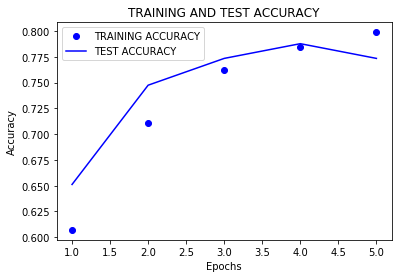

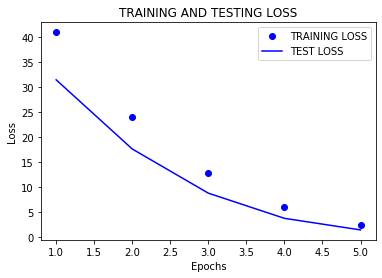

******************************
Finding the highest Test Accuracy and lowest Test Loss...
Maximum Testing Accuracy: 0.9666910767555237
Minimum Testing Loss: 0.12362805008888245
Value of optimum learning rate : 0.0004969734783533483
Value of optimum regularization: 0.00013520778122736498


In [16]:
acc=history.history['acc']
test_acc1=history.history['val_acc']
loss=history.history['loss']
test_loss1=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='TRAINING ACCURACY')
plt.plot(epochs,test_acc1,'b',label='TEST ACCURACY')
plt.title('TRAINING AND TEST ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='TRAINING LOSS')
plt.plot(epochs,test_loss1,'b',label='TEST LOSS')
plt.title('TRAINING AND TESTING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print ("*"*30)
print ("Finding the highest Test Accuracy and lowest Test Loss...")

index1=0
index2=0
max_test_acc=max(test_acc[0])
min_test_loss=min(test_loss[0])
for i in range(25):
    temp1=max(test_acc[i])
    if(temp1>=max_test_acc):
        max_test_acc=temp1
        index1=i
        temp2=min(test_loss[i])
    if(temp2<min_test_loss):
        min_test_loss=temp2
        index2=i  

print ('Maximum Testing Accuracy:',max_test_acc)
print ('Minimum Testing Loss:',min_test_loss)
print ('Value of optimum learning rate :',lr_val[index1])
print ('Value of optimum regularization:',reg_val[index2])


In [35]:
model=load_model("model.h5")

In [38]:
im=cv2.imread('C:/Users/swati/Desktop/IP Project/7.jpg')
cv2.imshow('Image with Face',im)
cv2.waitKey(0)
cv2.destroyAllWindows()
im=np.array(im).astype('float32')/255
im=cv2.resize(im,(60,60))
im = np.expand_dims(im, axis=0)
p=model.predict(im)
print(p)

[[0.5469646]]


In [40]:
im2=cv2.imread('C:/Users/swati/Desktop/IP Project/2.jpg')
cv2.imshow('Image with No Face',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()
im2=np.array(im2).astype('float32')/255
im2=cv2.resize(im2,(60,60))
im2 = np.expand_dims(im2, axis=0)
p1=model.predict(im2)
print(p1)

[[0.07569411]]


# CNN for Face Detection with Bounding Box Regression

Pretrained model VGG16 is used for this purpose. VGG16 model is trained on ImageNet dataset.
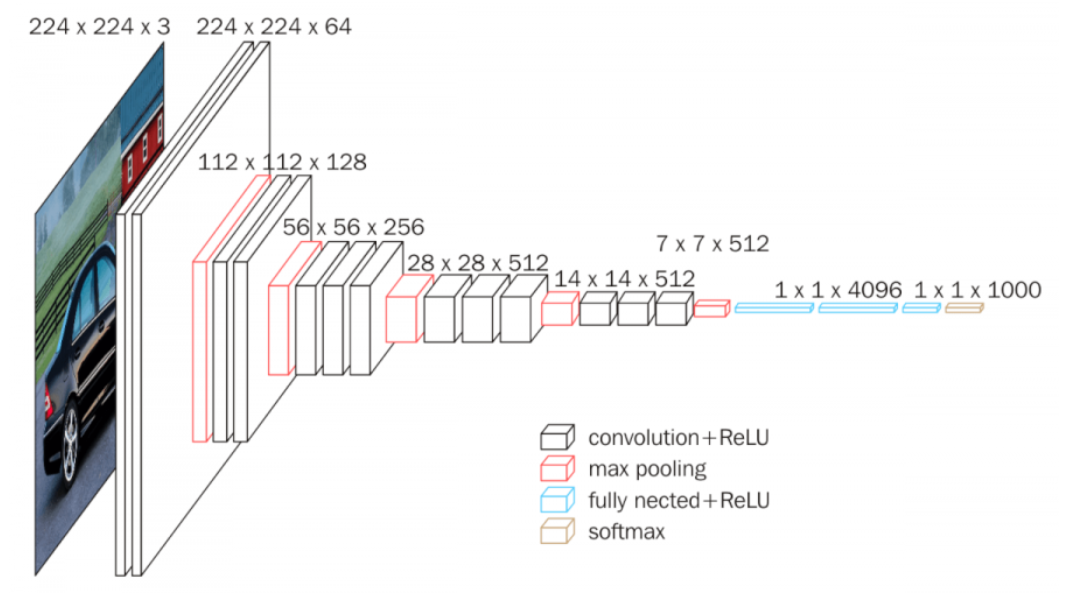

This model is generally used for image classification or face recognition task. But the last fully connected part of this model is replaced with several dense layers to make it fit for getting regression output containing bounding box coordinates.

In [19]:
Base_dir = os.getcwd()
image_dir = os.path.join(Base_dir,'final_dataset','images')
annot_dir = os.path.join(Base_dir,'final_dataset')

In [20]:
data1 = pd.read_csv(os.path.join(annot_dir,'_annotations.csv'))
data2 = pd.read_csv(os.path.join(annot_dir,'new_coodinate_mask.csv'))

In [21]:
filename = []
data = []
coords = []
for i in data1.index:
    filename.append(data1["filename"][i])
    image = cv2.imread(os.path.join(image_dir,data1["filename"][i])) 
    (h, w) = image.shape[:2]
    X1 = data1["xmin"][i]/w
    Y1 = data1["ymin"][i]/h
    X2 = data1["xmax"][i]/w
    Y2 = data1["ymax"][i]/h
    coords.append([X1,Y1,X2,Y2])
    image = load_img(os.path.join(image_dir,data1["filename"][i]), target_size=(224, 224))
    image = img_to_array(image)
    data.append(image)

In [22]:
print(type(data2["region_shape_attributes"][0]))
print(len(filename))
print(len(data))
print(len(coords))

<class 'str'>
951
951
951


In [23]:
for i in data2.index:
    filename.append(data2["#filename"][i])
    image = cv2.imread(os.path.join(image_dir,data2["#filename"][i])) 
    (h, w) = image.shape[:2]
    d = data2["region_shape_attributes"][i]
    res = json.loads(d)
    X1 = res['x']/w
    Y1 = res['y']/h
    X2 = X1+res["width"]/w
    Y2 = Y1+res["height"]/h
    coords.append([X1,Y1,X2,Y2])
    image = load_img(os.path.join(image_dir,data1["filename"][i]), target_size=(224, 224))
    image = img_to_array(image)
    data.append(image)

In [24]:
print(len(coords))
print(len(filename))
print(len(data))

1252
1252
1252


In [25]:
data = np.array(data, dtype="float32") / 255.0
coords = np.array(coords, dtype="float32")
# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(data, coords, filename, test_size=0.10,
    random_state=42)
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]
# write the testing filenames to disk so that we can use then
# when evaluating/testing our bounding box regressor
"""
print("[INFO] saving testing filenames...")
f = open(config.TEST_FILENAMES, "w")
f.write("\n".join(testFilenames))
f.close()
"""

'\nprint("[INFO] saving testing filenames...")\nf = open(config.TEST_FILENAMES, "w")\nf.write("\n".join(testFilenames))\nf.close()\n'

In [26]:
print(data.shape)

(1252, 224, 224, 3)


In [27]:
print(len(trainImages))
print(len(testImages))
print(trainImages.shape)

1126
126
(1126, 224, 224, 3)


In [28]:
vgg = VGG16(weights="imagenet", include_top=False,input_tensor=layers.Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = layers.Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = layers.Dense(128, activation="relu")(flatten)
bboxHead = layers.Dense(64, activation="relu")(bboxHead)
bboxHead = layers.Dense(32, activation="relu")(bboxHead)
bboxHead = layers.Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model1 = models.Model(inputs=vgg.input, outputs=bboxHead)

In [29]:
opt = optimizers.Adam(lr=lr)
model1.compile(loss="mse", optimizer=opt,metrics=['acc'])
print(model1.summary())
# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model1.fit(trainImages, trainTargets,validation_data=(testImages, testTargets),batch_size=32,epochs=25,verbose=1)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

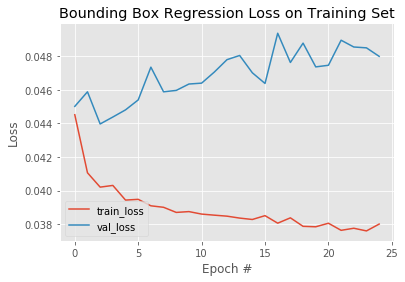

In [30]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

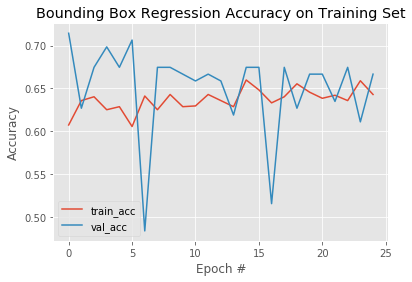

In [31]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 25), H.history["val_acc"], label="val_acc")
plt.title("Bounding Box Regression Accuracy on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [41]:
image = load_img('C:/Users/swati/Desktop/IP Project/5.jpg', target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)
preds = model1.predict(image)[0]
(startX, startY, endX, endY) = preds
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
image = cv2.imread('C:/Users/swati/Desktop/IP Project/5.jpg')
image = imutils.resize(image, width=600)
(h, w) = image.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box on the image
cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
model1.save("model1.h5")

In [42]:
model1 = load_model('model1.h5')
#model.summary()
image = load_img('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss4.png', target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)
preds = model1.predict(image)[0]
(startX, startY, endX, endY) = preds
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
image = cv2.imread('C:/Users/swati/Desktop/IP Project/dataset/images/maksssksksss4.png')
image = imutils.resize(image, width=600)
(h, w) = image.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box on the image
cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()